<a href="https://colab.research.google.com/github/PalakDograCSE-AI2004/CVDL_Summer_Internship/blob/main/Image_processing_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#torchvision is the package for image processing
#torchvision.dataset-to get pre defined datasets from pytorch
#torchvision.models-to get pre defined models from pytorch
#torchvision.transformers-to perform modifications on image
#torchvision.utils.data.DataLoaders-to load the data

In [ ]:
#importing base packages
import torch
#package for neural network
from torch import nn
#torchvision for imageprocessing
import torchvision
#to load dataset from torchvision
from torchvision import datasets
#to perform transformation and augmentation
from torchvision.transforms import ToTensor
#to plot images
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader



In [ ]:
#now we will load the data

train_data=datasets.FashionMNIST(
    root="dataset",#location(directory) where the data will be downloaded
    train=True,#to download the training data
    download=True,#download the data if data doesnot exists
    transform=ToTensor(),#convert images to torch tensor
    target_transform=None#here we are not changing the label names
    )

test_data=datasets.FashionMNIST(
    root="dataset",#location(directory) where the data will be downloaded
    train=False,
    download=True,#download the data if data doesnot exists
    transform=ToTensor(),#convert images to torch tensor
    )



100%|██████████| 26421880/26421880 [00:01<00:00, 16093013.16it/s]


Extracting dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 271209.99it/s]


Extracting dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5070388.99it/s]


Extracting dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15141849.22it/s]

Extracting dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



In [ ]:
#actually in our dataset FashionMNIST we have 10 categories(classes) and their corresponding images.
#9 categories have labels having index starting from 0 to 9.
#FashionMNIST also have 60000 train data and 10000 test data
#for more details google: torchvision.dataset FashionMNIST

In [ ]:
#it will give[total_images,height ,weidth]
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
#it will show all the classes within the dataset
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#this will calculate total training images
len(train_data.data)

60000

In [ ]:
#this will calculate total testing images
len(test_data.data)

10000

In [ ]:
#this is just downloading the data now we will learn how to retrieve the images and plot the images

In [ ]:
img,target=train_data[0]

In [ ]:
# at zero index we have label or target equal to 9 ie determined by output
#these index value and labels are randomly matched

target

9

In [ ]:
#and from dataset we can see that the image at label equal to 9 is ankle boot

In [ ]:
img.shape
#this will give the shape of image at label=9

torch.Size([1, 28, 28])

In [ ]:
#[colorchannel(since the image is black and white then we have colorchannel equalto 1) , height , width]
#[1,28,28]

In [ ]:
#now we will plot the image at 0 ie label=9

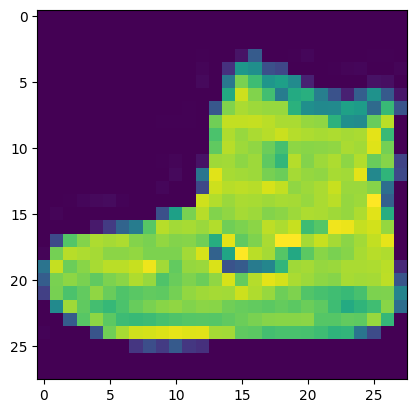

In [ ]:
plt.imshow(img.squeeze()) #here we need to squeeze the image so that dimensions become [28 x 28]
plt.show()

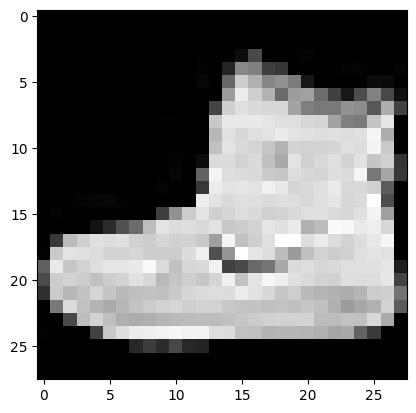

In [ ]:
#we can change the color to grey as
plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [ ]:
#now we will do the same with image at any random index say 100 and then check its label or target

In [ ]:
img,target=train_data[100]

In [ ]:
target

8

In [ ]:
img.shape


torch.Size([1, 28, 28])

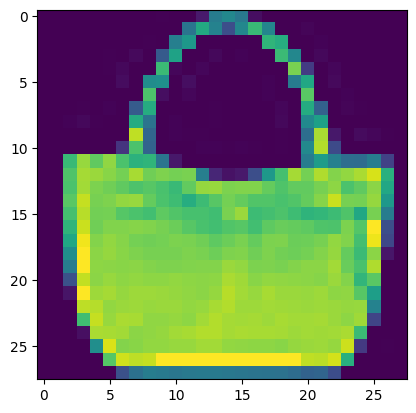

In [ ]:
plt.imshow(img.squeeze()) #here we need to squeeze the image so that dimensions become [28 x 28] because matplotlib acceptd 2D images
plt.show()

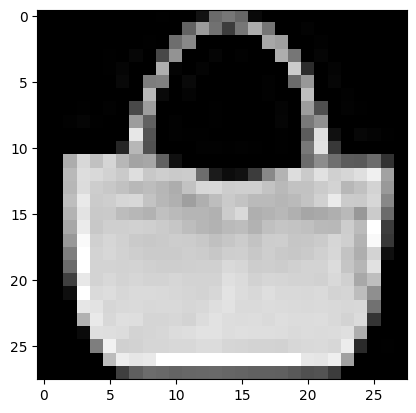

In [ ]:
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
#Similarly at every index we will be having any randomly assigned label

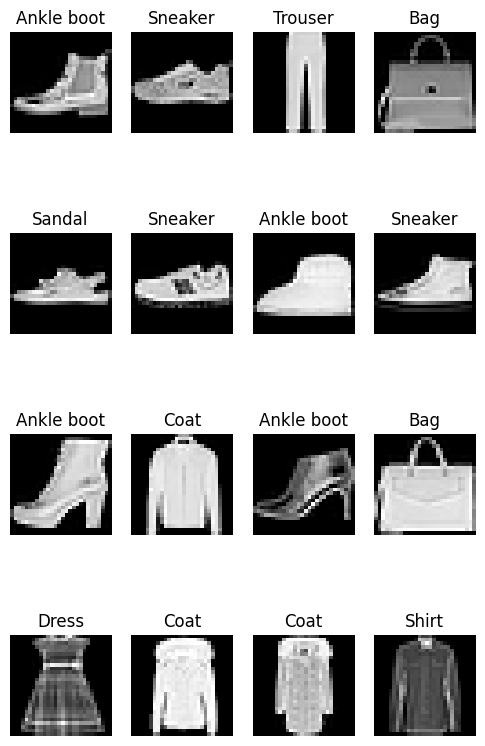

In [ ]:
#now lets plot all these images simultaneously

class_names=train_data.classes

#this will allocate a area/size of 6 x 10
fig=plt.figure(figsize=(6,10))

rows=4 #specify the no of rows
cols=4 #specify the no of col

# it will plot images= rows x cols ie 4 x 4 ie 16 random images

for i in range(1, rows*cols + 1):
  random_index=torch.randint(0, len(train_data) , size=[1]).item()
  img,target=train_data[random_index]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[target])
  plt.axis(False)



In [ ]:
#DataLoaders
#used to load the data

#turns large datasets into smaller chunks known as batches or mini batches
#generally we put chunk size of 32
# 60000 % 32 =1875 batches
# 1 batch=32 images



In [ ]:
from torch.utils.data import DataLoader

In [ ]:
Batch_size=32

train_dataLoader=DataLoader(
    train_data,# dataset that we have to convert into batches
    batch_size=Batch_size,#batch size ie how many samples per batch
    shuffle=True #to shuffle the data on every epoch
)

test_dataLoader=DataLoader(
    test_data,# dataset that we have to convert into batches
    batch_size=Batch_size,#batch size ie how many samples per batch
    shuffle=False #to shuffle the data on every epoch
)

In [ ]:
#now we will build a simple ANN model


In [ ]:
#Build Base Model

class Model(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
    nn.Flatten(),#Flatten -[1,28,28] -> [1,28 * 28]   we have total 28*28=784 features
    nn.Linear(in_features=input_shape,out_features=hidden_units),
    nn.ReLU(),#added ReLu activation function
    nn.Linear(in_features=hidden_units,out_features=output_shape),
    nn.ReLU()
    )


  def forward(self,x):
    return self.layer_stack(x)



In [ ]:
# input_shape(input neurons ie feature) = 28*28=784 featues per image
#hidden_units=neurons in hidden layer . could be any
#output_shape=10 because we have 10 classes

model=Model(input_shape=784,hidden_units=64,output_shape=len(class_names))



In [ ]:
model.to("cpu")

Model(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
# Evaluation metric
def accuracy(y_true, y_pred):
  # y_true = 1, y_pred = 1
  # y_true = 0, y_pred = 0
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification / len(y_pred)) * 100
  return acc

In [ ]:
#we will use Cross entropy loss function because it is a multi classification problem

loss_function=nn.CrossEntropyLoss()

#we will use Adam optimisation technique
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.1) #lr = learning rate


In [ ]:
#now we will write our training code

def train_step(model,data_loader,loss_fn,optimizer,accuracy,device):
  train_loss,train_acc=0,0
  model.to(device)

  for batch, (X,y) in enumerate(data_loader): #this will give the X=image ,y=target of each image from the batch of 32 one by one
    X,y=X.to(device),y.to(device)

    #FeedForward
    y_pred=model(X)

    #calculate loss
    train_loss=loss_fn(y_pred,y)
    train_loss += loss #this will show the totalloss of each batch at the end as above we calculated the loss per image
    train_acc += accuracy(y,y_pred.argmax(dim=1))

    #BackPropogation
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step()


  train_loss /=len(data_loader) # to get train_loss per epoch
  train_acc /=len(data_loader)  ## to get train_acc per epoch

  print(f"Train Acc : {train_acc :.3f} | Train_loss : { train_loss : .3f}")


In [ ]:
#now we will write our testing code

def test_step(model,data_loader,loss_fn,accuracy,device):#no need for optimisation in testing data
  test_loss,test_acc=0,0
  model.to(device)
  model.eval()#always do this with testing data


  with torch.inference_mode():
   for batch, (X,y) in data_loader: #this will give the X=image ,y=target of each image from the batch of 32 one by one
    X,y=X.to(device),y.to(device)

    #FeedForward
    y_pred=model(X)

    #calculate loss
    loss=loss_fn(y_pred,y)
    test_loss += loss #this will show the totalloss of each batch at the end as above we calculated the loss per image
    test_acc += accuracy(y,y_pred.argmax(dim=1))

    # no backprpogation in testing
  test_loss /=len(data_loader) # to get train_loss per epoch
  test_acc /=len(data_loader)  ## to get train_acc per epoch

  print(f"Test Acc : {test_acc :.3f} | Test_loss : { train_loss : .3f}")


In [ ]:
#tqdm-used to show the progress of the loop
from tqdm import tqdm

epochs=5

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epochs}")
  train_step(model,train_dataLoader,loss_function,optimizer,accuracy,"cpu")
  test_step(model,test_dataLoader,loss_function,accuracy,"cpu")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 5


NameError: ignored